In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [209]:
main = pd.read_csv('/content/sample_data/Sport car price.csv')
data = pd.DataFrame(main)

In [210]:
data.head(5)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [212]:
data.dropna(inplace=True)  # Remove missing values
data.drop_duplicates(inplace=True, keep='last')  # Remove duplicate rows
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 707 non-null    object
 1   Car Model                707 non-null    object
 2   Year                     707 non-null    int64 
 3   Engine Size (L)          707 non-null    object
 4   Horsepower               707 non-null    object
 5   Torque (lb-ft)           707 non-null    object
 6   0-60 MPH Time (seconds)  707 non-null    object
 7   Price (in USD)           707 non-null    object
dtypes: int64(1), object(7)
memory usage: 49.7+ KB


In [213]:
# Convert 'Price (in USD)' to numeric
data['Price (in USD)'] = data['Price (in USD)'].apply(lambda x: x.replace(',', '')).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          707 non-null    object 
 4   Horsepower               707 non-null    object 
 5   Torque (lb-ft)           707 non-null    object 
 6   0-60 MPH Time (seconds)  707 non-null    object 
 7   Price (in USD)           707 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 49.7+ KB


In [214]:
# Convert '0-60 MPH Time' to numeric
data['0-60 MPH Time (seconds)'] = data['0-60 MPH Time (seconds)'].str.replace('<', '').astype(float)  # Convert 0-60 MPH Time to numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          707 non-null    object 
 4   Horsepower               707 non-null    object 
 5   Torque (lb-ft)           707 non-null    object 
 6   0-60 MPH Time (seconds)  707 non-null    float64
 7   Price (in USD)           707 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 49.7+ KB


In [215]:
# Convert 'Torque (lb-ft)' to numeric
data['Torque (lb-ft)'] = data['Torque (lb-ft)'].str.replace('-', '0').str.replace('+', '').str.replace(',', '').astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          707 non-null    object 
 4   Horsepower               707 non-null    object 
 5   Torque (lb-ft)           707 non-null    int64  
 6   0-60 MPH Time (seconds)  707 non-null    float64
 7   Price (in USD)           707 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 49.7+ KB


In [216]:
# Convert 'Horsepower' to numeric
data['Horsepower'] = data['Horsepower'].str.replace(',', '').str.replace('+', '').astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          707 non-null    object 
 4   Horsepower               707 non-null    int64  
 5   Torque (lb-ft)           707 non-null    int64  
 6   0-60 MPH Time (seconds)  707 non-null    float64
 7   Price (in USD)           707 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 49.7+ KB


In [217]:
# for column in data.columns:
#     print(data[column].value_counts())
#     print("-"*50)
print(data[data.columns[-5]].unique())

['5.2' '6.2' '3' '3.5' '4.7' '2' '2.9' '6' '4' '3.7' 'Electric Motor'
 '2.5' '1.5 + Electric' '6.5' '3.8' '5' '3.9' 'Electric' '8.4' '6.6' '7'
 '4.4' '1.7' '6.8' '8' '3.3' '-' '6.7' '1.8' 'Electric (tri-motor)' '5.5'
 'Electric (93 kWh)' 'Electric (100 kWh)' 'Hybrid (4.0)' '4.6' '3.6'
 'Hybrid' '5.7' '1.5' '2.0 (Electric)' '4.0 (Hybrid)' '0' '6.4' '6.3'
 '2.3']


In [218]:
# Creating new coloum of 0 & 1 for Electric
data['Electric'] = data['Engine Size (L)'].copy()
data['Electric'] = data['Electric'].apply(lambda x : 0 if 'Electric' not in str(x) else 1)  # 0 = 'NO' 1 = 'YES'
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10 to 1006
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          707 non-null    object 
 4   Horsepower               707 non-null    int64  
 5   Torque (lb-ft)           707 non-null    int64  
 6   0-60 MPH Time (seconds)  707 non-null    float64
 7   Price (in USD)           707 non-null    float64
 8   Electric                 707 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 55.2+ KB


In [219]:
# Creating new coloum of 0 & 1 for Hybrid
data['Hybrid'] = data['Engine Size (L)'].copy()
data['Hybrid'] = data['Hybrid'].apply(lambda x : 0 if 'Hybrid' not in str(x) else 1)  # 0 = 'NO' 1 = 'YES'
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10 to 1006
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          707 non-null    object 
 4   Horsepower               707 non-null    int64  
 5   Torque (lb-ft)           707 non-null    int64  
 6   0-60 MPH Time (seconds)  707 non-null    float64
 7   Price (in USD)           707 non-null    float64
 8   Electric                 707 non-null    int64  
 9   Hybrid                   707 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 60.8+ KB


In [220]:
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          707 non-null    object 
 4   Horsepower               707 non-null    int64  
 5   Torque (lb-ft)           707 non-null    int64  
 6   0-60 MPH Time (seconds)  707 non-null    float64
 7   Price (in USD)           707 non-null    float64
 8   Electric                 707 non-null    int64  
 9   Hybrid                   707 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 55.4+ KB


In [221]:
data.head(10)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Electric,Hybrid
0,Aston Martin,DB11,2021,5.2,630,516,3.5,201495.0,0,0
1,Dodge,Challenger SRT Hellcat,2022,6.2,717,656,3.5,61000.0,0,0
2,Jaguar,F-Type,2022,3,296,295,5.4,70100.0,0,0
3,Lotus,Evora GT,2021,3.5,416,317,3.8,104450.0,0,0
4,Maserati,GranTurismo,2021,4.7,454,384,4.8,150000.0,0,0
5,Porsche,Boxster,2021,2,300,280,4.7,62000.0,0,0
6,Alfa Romeo,Giulia Quadrifoglio,2022,2.9,505,443,3.8,78000.0,0,0
7,Ariel,Atom,2021,2,320,243,2.8,75000.0,0,0
8,Bentley,Continental GT,2021,6,626,664,3.6,225000.0,0,0
9,Mercedes-AMG,SLS AMG,2021,6.2,622,468,3.5,248000.0,0,0


In [222]:
# Remove the electric and hybrid values from Engine size
data['Engine Size (L)'] = data['Engine Size (L)'].apply(lambda x : x if len(str(x)) == 1 else re.search('\d{1}\.\d{1}', str(x)))
data['Engine Size (L)'] = data['Engine Size (L)'].apply(lambda x : x.group() if type(x) == re.Match else x)
data['Engine Size (L)'] = data['Engine Size (L)'].str.replace('-', '').str.replace('', '0').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          670 non-null    float64
 4   Horsepower               707 non-null    int64  
 5   Torque (lb-ft)           707 non-null    int64  
 6   0-60 MPH Time (seconds)  707 non-null    float64
 7   Price (in USD)           707 non-null    float64
 8   Electric                 707 non-null    int64  
 9   Hybrid                   707 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 55.4+ KB


In [223]:
'''
3.  Use Pandas to explore the dataset by computing summary statistics for each column, such as mean, median, mode, standard deviation, and range.
'''
summary_stats = data.describe()  # Compute summary statistics
print(summary_stats)

              Year  Engine Size (L)    Horsepower  Torque (lb-ft)  \
count   707.000000       670.000000    707.000000      707.000000   
mean   2021.151344        41.341552    631.937765      563.605375   
std       2.347564        15.252562    463.852810      503.157975   
min    1965.000000         0.000000    181.000000        0.000000   
25%    2021.000000        30.050000    454.000000      398.000000   
50%    2021.000000        40.000000    591.000000      505.000000   
75%    2022.000000        60.000000    710.000000      626.500000   
max    2023.000000        80.040000  10000.000000    10000.000000   

       0-60 MPH Time (seconds)  Price (in USD)    Electric      Hybrid  
count               707.000000    7.070000e+02  707.000000  707.000000  
mean                  3.575205    3.808800e+05    0.052334    0.005658  
std                   0.790933    7.652793e+05    0.222857    0.075058  
min                   1.800000    2.500000e+04    0.000000    0.000000  
25%          

In [224]:
'''
4.  Use Pandas to group the dataset by car make and compute the average price for each make.
'''
average_price_by_make = data.groupby('Car Make')['Price (in USD)'].mean().reset_index()
print(average_price_by_make)

         Car Make  Price (in USD)
0           Acura    1.581650e+05
1      Alfa Romeo    7.459967e+04
2          Alpine    7.150000e+04
3           Ariel    7.500000e+04
4    Aston Martin    2.224352e+05
5            Audi    9.135337e+04
6             BMW    8.064097e+04
7         Bentley    2.161760e+05
8         Bugatti    3.386333e+06
9       Chevrolet    5.465270e+04
10          Dodge    7.166649e+04
11        Ferrari    3.000600e+05
12           Ford    2.328552e+05
13         Jaguar    7.643810e+04
14            Kia    5.220000e+04
15     Koenigsegg    2.900000e+06
16    Lamborghini    4.732617e+05
17          Lexus    9.383333e+04
18          Lotus    6.072589e+05
19       Maserati    1.464203e+05
20          Mazda    2.683000e+04
21        McLaren    3.216477e+05
22   Mercedes-AMG    1.538000e+05
23  Mercedes-Benz    1.615324e+05
24         Nissan    4.681161e+04
25         Pagani    2.809091e+06
26    Pininfarina    2.500000e+06
27       Polestar    1.550000e+05
28        Pors

In [225]:
'''
5.  Use Pandas to group the dataset by year and compute the average horsepower for each year.
'''
average_horsepower_by_year = data.groupby('Year')['Horsepower'].mean().reset_index()
print(average_horsepower_by_year)

   Year  Horsepower
0  1965  435.000000
1  2014  622.000000
2  2015  660.400000
3  2017  645.000000
4  2019  615.333333
5  2020  462.083333
6  2021  628.527778
7  2022  651.601504
8  2023  675.000000


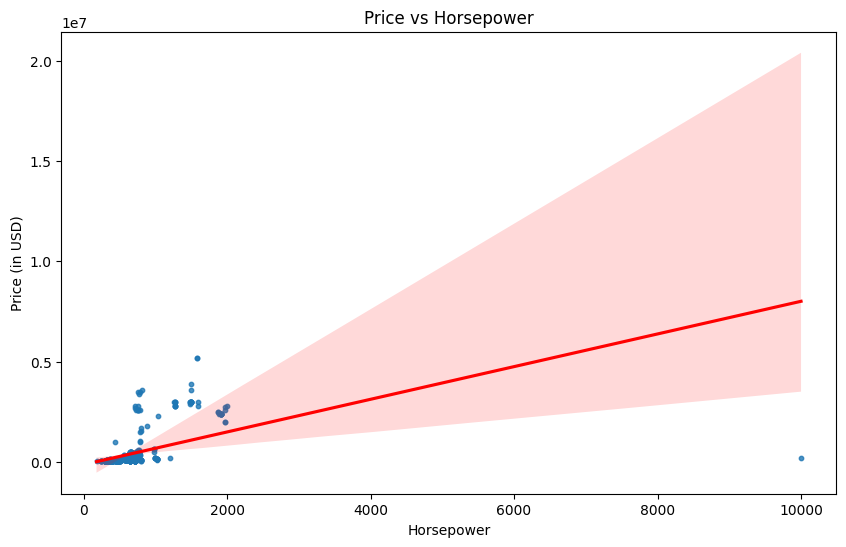

In [226]:
'''
6.  Use Pandas to create a scatter plot of price versus horsepower, and add a linear regression line to the plot.
'''
plt.figure(figsize=(10, 6))
sns.regplot(x='Horsepower', y='Price (in USD)', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Price vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price (in USD)')
plt.show()

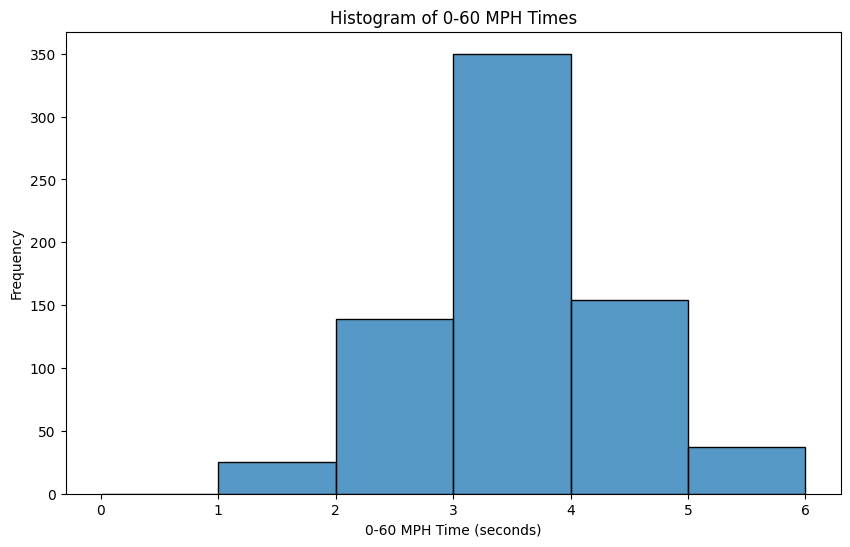

In [227]:
'''
7.  Use Pandas to create a histogram of the 0-60 MPH times in the dataset, with bins of size 0.5 seconds.
'''
plt.figure(figsize=(10, 6))
sns.histplot(data['0-60 MPH Time (seconds)'], bins=range(0, int(data['0-60 MPH Time (seconds)'].max()) + 1, 1), kde=False)
plt.title('Histogram of 0-60 MPH Times')
plt.xlabel('0-60 MPH Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [228]:
'''
8.  Use Pandas to filter the dataset to only include cars with a price greater than $500,000, and then sort the resulting dataset by horsepower in descending order.
'''
filtered_cars = data[data['Price (in USD)'] > 500000].sort_values(by='Horsepower', ascending=False)
print(filtered_cars)

        Car Make  Car Model  Year  Engine Size (L)  Horsepower  \
585        Lotus      Evija  2021              NaN        2000   
326        Lotus      Evija  2022              NaN        1973   
248        Lotus      Evija  2022              NaN        1973   
687        Lotus      Evija  2022              NaN        1973   
703        Lotus      Evija  2021              NaN        1972   
..           ...        ...   ...              ...         ...   
111  Lamborghini  Aventador  2021            60.05         730   
577  Lamborghini  Aventador  2021            60.05         730   
10        Pagani     Huayra  2021            60.00         720   
94        Pagani     Huayra  2020            60.00         720   
96        Shelby      Cobra  1965            70.00         435   

     Torque (lb-ft)  0-60 MPH Time (seconds)  Price (in USD)  Electric  Hybrid  
585            1254                      2.8       2800000.0         1       0  
326            1254                      2.5 

In [229]:
'''
9.  Use Pandas to export the cleaned and transformed dataset to a new CSV file.
'''
data.to_csv('Cleaned_Sport_Car_Price.csv', index=False)